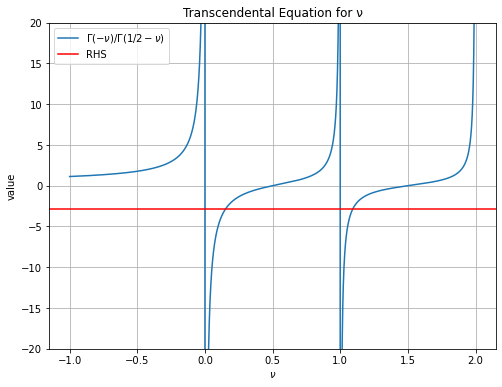

Solutions for ν:
  ν = -0.0
  ν = 0.1533727706
  ν = 1.0
  ν = 1.0935256571

Corresponding relative energies E_r = ħω (2ν + 1):
  E_r = 1.0
  E_r = 1.3067455412
  E_r = 3.0
  E_r = 3.1870513142


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma
from scipy.optimize import brentq

# ===========================================
# Parameters
# ===========================================

g = 1.0                  # interaction strength
hbar = 1.0               # set units
omega = 1.0              # set units

# ===========================================
# Functions
# ===========================================

def lhs(nu):
    """Left-hand side Gamma(-nu)/Gamma(1/2 - nu)."""
    return gamma(-nu) / gamma(0.5 - nu)

def rhs_value(g):
    """Constant RHS."""
    return -2**1.5 / g

rhs = rhs_value(g)

# ===========================================
# Plot
# ===========================================

nus = np.linspace(-1, 2, 5000)
vals = lhs(nus)
vals[~np.isfinite(vals)] = np.nan   # remove infinities

plt.figure(figsize=(8,6))
plt.plot(nus, vals, label=r'$\Gamma(-\nu)/\Gamma(1/2-\nu)$')
plt.axhline(rhs, color='red', label='RHS')
plt.xlabel(r'$\nu$')
plt.ylabel('value')
plt.title("Transcendental Equation for ν")
plt.ylim(-20,20)
plt.grid(True)
plt.legend()
plt.show()

# ===========================================
# Find solutions (roots of lhs(nu)-rhs)
# ===========================================

def f(nu):
    return lhs(nu) - rhs

solutions = []

# Choose bracketing intervals manually or auto-scan:
nu_grid = np.linspace(-1, 2, 3000)
f_grid = f(nu_grid)

# Find sign changes in f(nu)
for i in range(len(nu_grid)-1):
    if np.isnan(f_grid[i]) or np.isnan(f_grid[i+1]):
        continue
    if f_grid[i] * f_grid[i+1] < 0:
        # brentq requires a bracket where the function changes sign
        try:
            root = brentq(f, nu_grid[i], nu_grid[i+1])
            solutions.append(root)
        except ValueError:
            pass

solutions = sorted(set([round(r, 10) for r in solutions]))

print("Solutions for ν:")
for s in solutions:
    print("  ν =", s)

# ===========================================
# Energies
# ===========================================

print("\nCorresponding relative energies E_r = ħω (2ν + 1):")
for s in solutions:
    E_r = hbar * omega * (2*s + 1)
    print(f"  E_r = {E_r}")
